In [1]:
%matplotlib inline
import os
import pandas as pd

In [2]:
%matplotlib inline
from datetime import datetime, date, timedelta
import matplotlib as mpl
import dateutil
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rcParams
import seaborn as sns
import locale
import requests
from pandas import ExcelWriter
import numpy as np
# import matplotlib.ticker as tick

In [3]:
sns.set(style='ticks')
# pal = sns.color_palette([
#     [31 / 255, 73 / 255, 125 / 255], #JPMBlue
#     [247 / 255, 150 / 255, 70 / 255], #JPMOrange
#     [155 / 255, 187 / 255, 89 / 255] #JPMGreen
# ])

pal = sns.color_palette([
    [222 / 255, 110 / 255, 116 / 255], #JPMBlue
    [101 / 255, 134 / 255, 194 / 255], #JPMOrange
    [43 / 255, 175 / 255, 100 / 255] #JPMGreen
])

linestyles = [
    {'c': pal[0], 'linestyle': '-'}, 
    {'c': pal[1], 'linestyle': '-'}, 
    {'c': pal[0], 'linestyle': 'dashed'}, 
    {'c': pal[1], 'linestyle': 'dashed'}, 
    {'c': pal[0], 'linestyle': ':'}, 
    {'c': pal[1], 'linestyle': ':'}, 
    {'c': pal[2], 'linestyle': '-'}, 
    {'c': pal[2], 'linestyle': 'dashed'}, 
    {'c': pal[2], 'linestyle': ':'}, 
    
]

barstyles = [
    {'color': pal[0], },
    {'color': pal[0], },
    {'edgecolor': pal[0], 'color': 'white', 'linewidth': 1, 'hatch': '////'},
    {'edgecolor': pal[1], 'color': 'white', 'linewidth': 1, 'hatch': '////'},
    {'edgecolor': pal[0], 'color': 'white', 'linewidth': 1, 'hatch': '....'},
    {'edgecolor': pal[1], 'color': 'white', 'linewidth': 1, 'hatch': '....'},
    
]

rcParams = {
    'font.family' : 'sans-serif',
    'font.sans-serif' : 'Arial',
    'font.weight' : 'bold',
    'font.stretch' : 'condensed',
    'figure.autolayout' : False,
    'hatch.linewidth' : 0.2
}

csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
# Plantagenet Cherokee

# CHARTDIR
SAVEFIG_KWARGS = {'dpi': 72*4}
LEGEND_KWARGS = {'frameon': True, 'framealpha': 0.9, 'labelspacing': 0.4}
CHART_GAP = timedelta(days=20)
CHART_TITLE_ALIGN = 'left'

# yearsFmt = mdates.DateFormatter('%b-%Y')
# yearsFmt = mdates.DateFormatter('%b-%d')
# yearsFmt = mdates.DateFormatter('%Y')
fontsize = 15
fontweight = 'regular'
title_fontsize = 15
title_fontweight = 'regular'
tick_label_size = 15
tick_label_weight = 'regular'
legend_title_fontsize = 15
legend_title_fontweight = 'regular'
legend_label_fontsize = 15
legend_label_fontweight = 'regular'

annotation_fontsize = 15
annotation_fontweight = 'regular'
xticks_params = {
    'pad' : 1,
    'length' : 3,
}
yticks_params = {
    'pad' : 2,
    'length' : 2,
}

savefig_params = {
    'bbox_inches' : 'tight',
    'pad_inches' : 0.4,
}
xlabel_params = {
    'position' : (0.5,0.5),
    'fontsize' : 15,
    'fontweight' : 'regular',
    'labelpad': None,
}
ylabel_params = {
    'fontsize' : 15,
    'fontweight' : 'regular',
}

from matplotlib.ticker import FuncFormatter
def crores(x,pos):
    return '%1.1f' % (x*1e-7)

formatter_cr = FuncFormatter(crores)

footnote_fontsize = 15
footnote_fontweight = 'regular'
fontname = "Baskerville"
def apply_to_axes(axes, footnote_text = 'AllStuffData'):
    _axes = (axes,) if not isinstance(axes, tuple) else axes
    for ax in axes:
        ax.xaxis.label.set_fontsize(xlabel_params['fontsize'])
        ax.yaxis.label.set_fontsize(ylabel_params['fontsize'])
        for item in [ax.xaxis.label, ax.yaxis.label]:
            item.set_fontweight(fontweight)
            item.set_fontname(fontname)
        
        ax.title.set_fontsize(title_fontsize)
        ax.title.set_fontweight(title_fontweight)
        ax.title.set_fontname(fontname)
        
        for item in ax.get_xticklabels() + ax.get_yticklabels():
            item.set_fontsize(tick_label_size)
            item.set_fontweight(tick_label_weight)
            item.set_fontname(fontname)
            
        if ax.get_legend() is not None:
            lt = ax.get_legend().get_title()
            lt.set_fontsize(legend_title_fontsize)
            lt.set_fontweight(legend_title_fontweight)
            lt.set_fontname(fontname)
            t0 = ax.get_legend().get_texts()[0]
            t0.set_fontsize(legend_label_fontsize)
            t0.set_fontweight(legend_label_fontweight)
            t0.set_fontname(fontname)
        
        footnote = ax.annotate(footnote_text, **footnote_params)
        footnote.set_fontsize(footnote_fontsize)
        footnote.set_fontname(fontname)
        footnote.set_fontweight(footnote_fontweight)
        
    return axes

In [4]:
os.getcwd()

'/Users/gopal/Desktop/AllStuffData/notebooks'

In [5]:
file_dir = os.getcwd() + "/Econ_Datasets/ConsumerEconomy/"

In [6]:
dfs= []
for item in os.listdir(file_dir):
    if item[-3:] == "csv":
        try:
            df = pd.read_csv(file_dir + item)
            df.Year = pd.to_datetime(df.Year)
            df = df.sort_values(by='Year')
            df = df[['Year','Value']]
            df.columns = ['date', (item.split(" ")[0]+"_"+item.split(" ")[1]+"_"+item.split(" ")[2]).replace("(","").replace(")","")]
            df.date = df.date.dt.to_period(freq='D')
            df = df.set_index('date')
            dfs.append(df)
        except:
            print(item)

In [7]:
df = pd.concat(dfs,axis=1)

In [8]:
df.columns

Index(['Broadband_subscriber_base', 'Tractor_sales_domestic',
       'Domestic_air_passengers', 'Passenger_vehicle_sales'],
      dtype='object')

In [35]:
x_min = datetime(2015,1,1)
x_max = date.today() + timedelta(200)
tickrule = dateutil.rrule.rrule(
    freq = dateutil.rrule.DAILY,
    interval = 366,
    dtstart = x_min,
    until = x_max,
)
pal = sns.color_palette([
    [0 / 255, 255 / 255, 255 / 255], #Blue
    [255 / 255, 255 / 255, 102 / 255], #Yellow
    [255 / 255, 80 / 255, 80 / 255], #Red
    [255 / 255, 153 / 255, 102 / 255] #Orange
])
yearsFmt = mdates.DateFormatter('%b-%Y')
footnote_params = {
    'xy': (0,-0.02),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,-0.06),
    'ncol': 3,
}

grid_kwargs = {
    'linestyle': '-',
    'linewidth': 0.5,
#     'color': 3,
}


SAVEFIG_KWARGS = {'dpi': 72*4}

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['lines.color'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR

In [31]:
df1 = df[['Passenger_vehicle_sales']]

In [32]:
df1 = df1.dropna()

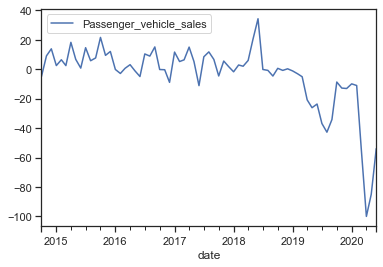

In [33]:
df1.plot.line()

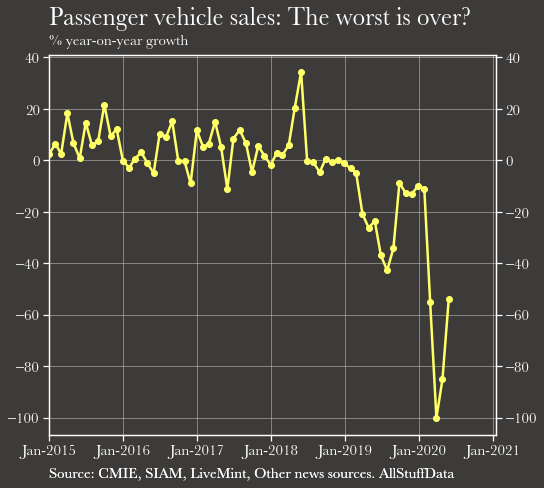

In [36]:
fig, ax = plt.subplots(figsize=(8,7))
for i, item in enumerate(list(df1.columns)):
    df_ = df1[[item]]
    mask = df_[item].notnull()
    ax.plot(df_.index[mask].start_time.values, df_[item][mask], c=pal[1],label = item, linewidth=2.5, zorder = 2, marker='o')
    
mpl.rcParams['savefig.facecolor'] = (61.0/255, 58.5/255, 57.0/255)
ax.set_facecolor((61.0/255, 58.5/255, 57.0/255))
fig.patch.set_facecolor((61.0/255, 58.5/255, 57.0/255))

ax.set_xticks([_ for _ in tickrule])
ax.grid(b=None, which='major', axis='both',**grid_kwargs)
ax.set_xlim([mdates.date2num(x_min),mdates.date2num(x_max)])
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())


fig.text(0.125,0.90,"% year-on-year growth",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
footnote_text = "Source: CMIE, SIAM, LiveMint, Other news sources. AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
ax.set_title('Passenger vehicle sales: The worst is over?', loc=CHART_TITLE_ALIGN, fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )

ax.xaxis.set_major_formatter(yearsFmt)
# ax.get_yaxis().set_major_formatter(formatter_cr)
# ax1.get_yaxis().set_major_formatter(formatter_cr)
f = os.path.dirname(os.getcwd())+'/todays_chart/pass_vech_sales_1.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)